<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 8</h1>

In [1]:
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from tensorflow import keras
from keras.datasets import cifar10
from tensorflow.keras import layers, activations

from keras.layers import Input, Flatten, Dense, Rescaling, MaxPooling2D, Conv2D, Dropout

2025-07-04 11:48:33.198639: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-04 11:48:33.295295: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-04 11:48:33.330974: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751622513.422414   10263 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751622513.466724   10263 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751622513.521424   10263 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

<h1 style="color: blue; font-size:50px;"> Esercizio 1 - Data augmentation</h1>

L'obiettivo di questo esercizio è vedere in azione la tecnica del "data augmentation", che consente di aumentare artificialmente la quantità di dati disponibili per l'addestramento di un modello, senza che debbano essere raccolti nuovi dati reali. Questo consente di migliorare la performance del modello ed allo stesso tempo di ridurre il rischio di overfitting (in quanto è più difficile che il modello impari troppo bene i dati d'addestramento). Nel campo delle immagini solitamente per aumentare la dimensione del campione si fa uso di:

- rotazioni

- riflessioni

- zoom o ritagli

- variazioni di luminosità o contrasto

- traslazioni

- aggiunta di rumore

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


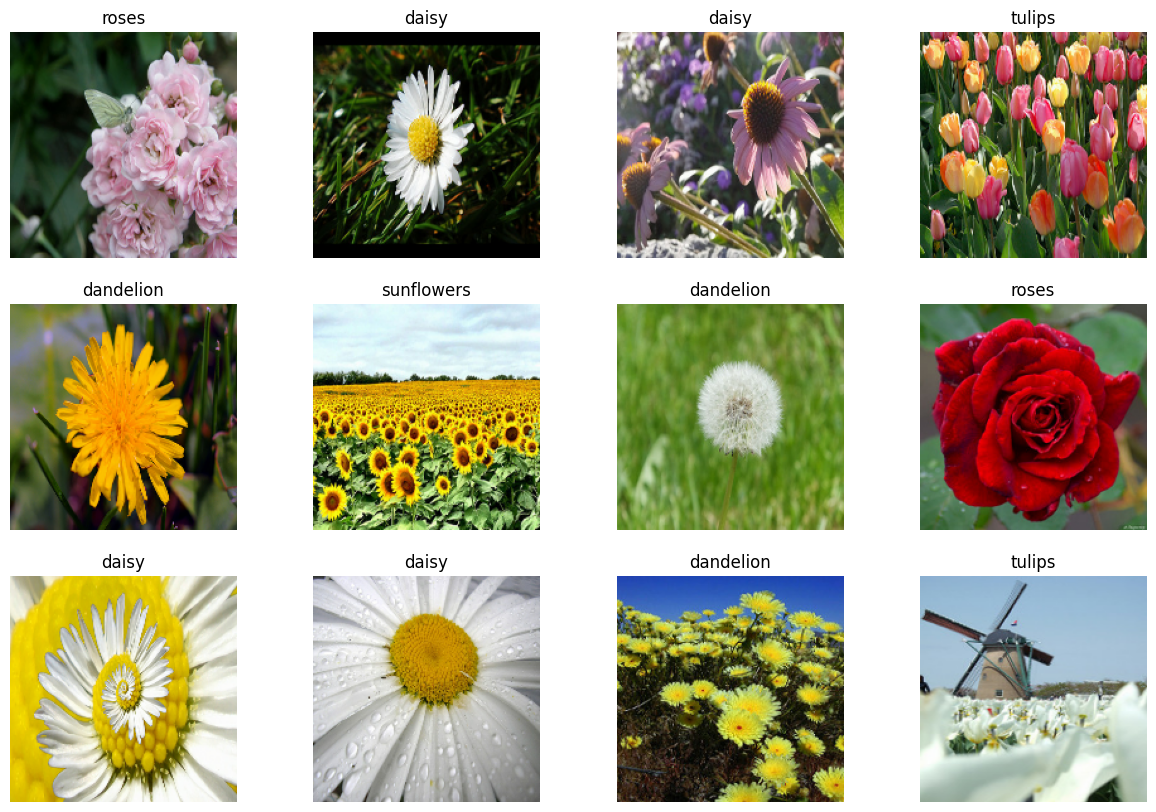

Dimensione batch foto:  (32, 180, 180, 3)
Dimensione batch labels:  (32,)


/home/filippo/.local/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/8


/home/filippo/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 ━━━━━━━━━━━━━━━━━━━━ 306s 3s/step - accuracy: 0.3057 - loss: 2.7362 - val_accuracy: 0.5531 - val_loss: 1.1958
Epoch 2/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.5529 - loss: 1.1152 - val_accuracy: 0.5886 - val_loss: 1.0894
Epoch 3/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 0.6482 - loss: 0.9427 - val_accuracy: 0.6022 - val_loss: 1.0354
Epoch 4/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.7876 - loss: 0.6018 - val_accuracy: 0.6117 - val_loss: 1.0986
Epoch 5/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.8682 - loss: 0.3904 - val_accuracy: 0.5831 - val_loss: 1.4277
Epoch 6/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 0.9438 - loss: 0.2149 - val_accuracy: 0.5926 - val_loss: 1.7225
Epoch 7/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 348s 4s/step - accuracy: 0.9636 - loss: 0.1238 - val_accuracy: 0.6022 - val_loss: 1.7377
Epoch 8/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.9900 - loss: 0.0486 - val_accuracy: 0.5845 - val_loss: 2.0025


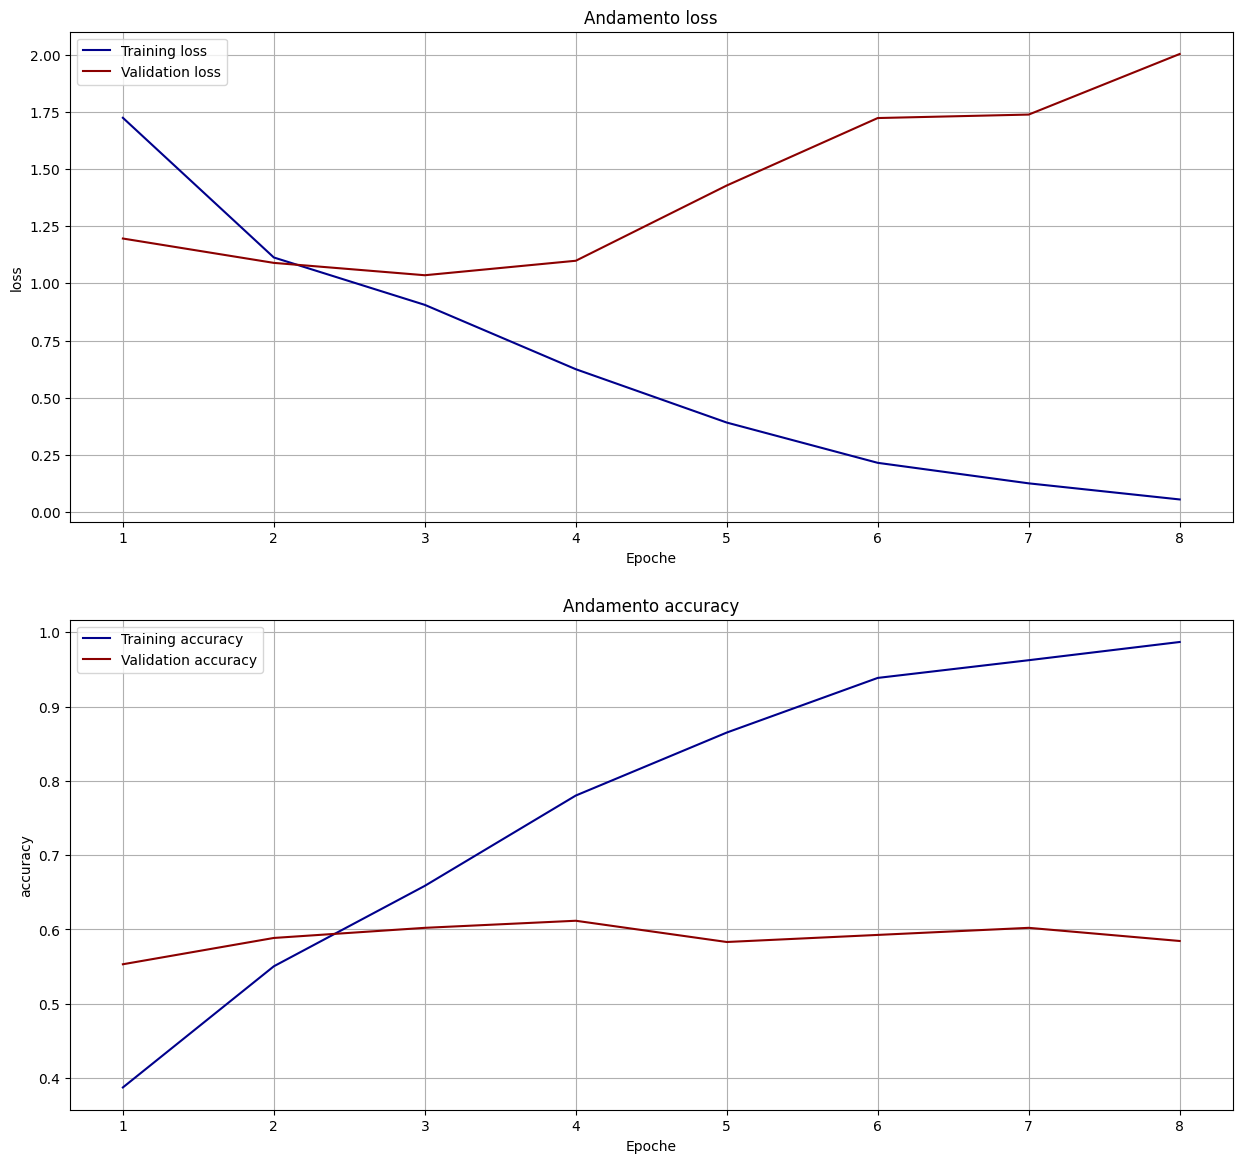

In [8]:
def builMod(imH, imW, numcl):
    # Funzione per costruire il modello in questione. 

    model = keras.Sequential()
    model.add(Rescaling(1./255, input_shape=(imH, imW, 3)))

    # Utilità del padding è la gestione dei pixel di bordo dell'immagine
    model.add(Conv2D(16, (3, 3), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))

    model.add(Flatten())
    
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(numcl, activation = 'softmax'))
    
    return model


def plotTrInfo(hist):
    # Funzione per graficare l'evoluzione di loss ed accuracy in fase di allenamento
    fig, ax = plt.subplots(2, 1, figsize=(15,14))

    dim = len(hist.history['loss'])
    lab = ['loss', 'accuracy']

    for i, l in enumerate(lab):
        ax[i].plot(np.linspace(1, dim, dim), hist.history[l], color = 'darkblue', label = "Training " + l)
        ax[i].plot(np.linspace(1, dim, dim), hist.history['val_'+l], color = 'darkred', label = "Validation " + l)
        ax[i].set_title("Andamento " + l)
        ax[i].set_xlabel("Epoche")
        ax[i].set_ylabel(l)

        ax[i].legend(loc="best")
        ax[i].grid(True)
    plt.show()


# Come primo step per la risoluzione dell'esercizio importo il dataset sul quale vogliamo allenare una 
# rete neurale pensata per risolvere un problema di classificazione. Nello specifico sono 3670 immagini 
# di fiori, ciascuna delle quali è un tensore tridimensionale di (180, 180, 3) pixel. Per caricare il 
# dataset scarichiamo una cartella compressa e la decomprimiamo. Il metodo keras.utils.get_file restituisce 
# il percorso alla cartella in cui si trovano i file estratti, di modo che lo si possa fornire a .Path(), 
# che è un metodo di pathlib, una libreria utile per gestire i percorsi dei file.
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)/ "flower_photos"


# Vogliamo ora procedere con il caricamento del dataset mediante keras.utils.image_dataset_from_directory
# che restituisce un tf.data.Dataset, che può essere alimentato direttamente nel modello per l'addestramento. 
# E' fondamentale specificare la validation_split, ossia la frazione di dati che vanno a costituire il training 
# e la validation.
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, validation_split=0.2, subset="training",
    seed=0, image_size=(180, 180), batch_size=32
)
class_names = train_ds.class_names

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, validation_split=0.2, subset="validation",
    seed=0, image_size=(180, 180), batch_size=32
)


# Stampo immagini di fiori per visualizzare parte del dataset
for im, lab in train_ds.take(1):
    plt.figure(figsize=(15, 10))

    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(im[i].numpy().astype("uint8"))
        ax.set_title(class_names[lab[i].numpy()])
        plt.axis("off")

    plt.show()

# Stampo dimensioni dei vari batch  
for imB, labB in train_ds:
    print("Dimensione batch foto: ", imB.shape)
    print("Dimensione batch labels: ", labB.shape)
    break


# Cache e prefetch (servono per velocizzare caricameno dati e passaggio
# da un batch al seguente del dataset)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

model = builMod(180, 180, len(class_names))
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
hist = model.fit(train_ds, validation_data=val_ds, epochs=8)

plotTrInfo(hist)